### One-Dimensional Aggregation: Respondent Metadata

In [1]:
exportdate = 20180315

The usual preparations...

In [14]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np

In [3]:
%matplotlib notebook

In [15]:
sns.set_style('darkgrid')

In [43]:
set(df['v_14'].values)

{'Larger (10-49)', 'Medium (5-10)', 'Small (1-4)', 'Very large (50+)'}

In [44]:
ratings = ['Essential', 'Worthwhile', 'Unimportant', 'Unwise']
teamsizes = ['Small (1-4)', 'Medium (5-10)', 'Larger (10-49)', 'Very large (50+)']

In [45]:
df = pd.read_csv(f'../analysis/{exportdate}repract_votelist_with_respondentmeta.csv')
df['Vote'] = pd.Categorical(df['Vote'].values, categories=ratings)
df['v_14'] = pd.Categorical(df['v_14'].values, categories=teamsizes)
df.head(1)

,EvID,PaperID,Vote,v_5,v_6,v_11,v_12,v_14,v_15,v_16,v_19,v_124,v_118,v_119,v_120,v_121
0,2,10,Worthwhile,Other (please specify),Product Management Coach,10,No,Medium (5-10),Other (please specify),Customer facing software products,Wide range (from automotive supplier to insura...,Germany,quoted,quoted,quoted,not quoted


### By Country

In [25]:
df.dtypes

EvID          int64
PaperID       int64
Vote       category
v_5          object
v_6          object
v_11         object
v_12         object
v_14         object
v_15         object
v_16         object
v_19         object
v_124        object
v_118        object
v_119        object
v_120        object
v_121        object
dtype: object

In [26]:
bycountry = df.groupby(['v_124', 'Vote']
            ).count().reset_index().rename({'index':'v_124'}
            ).pivot('v_124', 'Vote', 'EvID').sort_index(ascending=False).fillna(0)#[ratings]
#bycountry['TotalVotes'] = bycountry.sum(axis=1)
bycountry.head(2)

Vote,Essential,Worthwhile,Unimportant,Unwise
v_124,,,,
Uruguay,2.0,5.0,5.0,3.0
United States,49.0,102.0,48.0,1.0


Counts

<IPython.core.display.Javascript object>


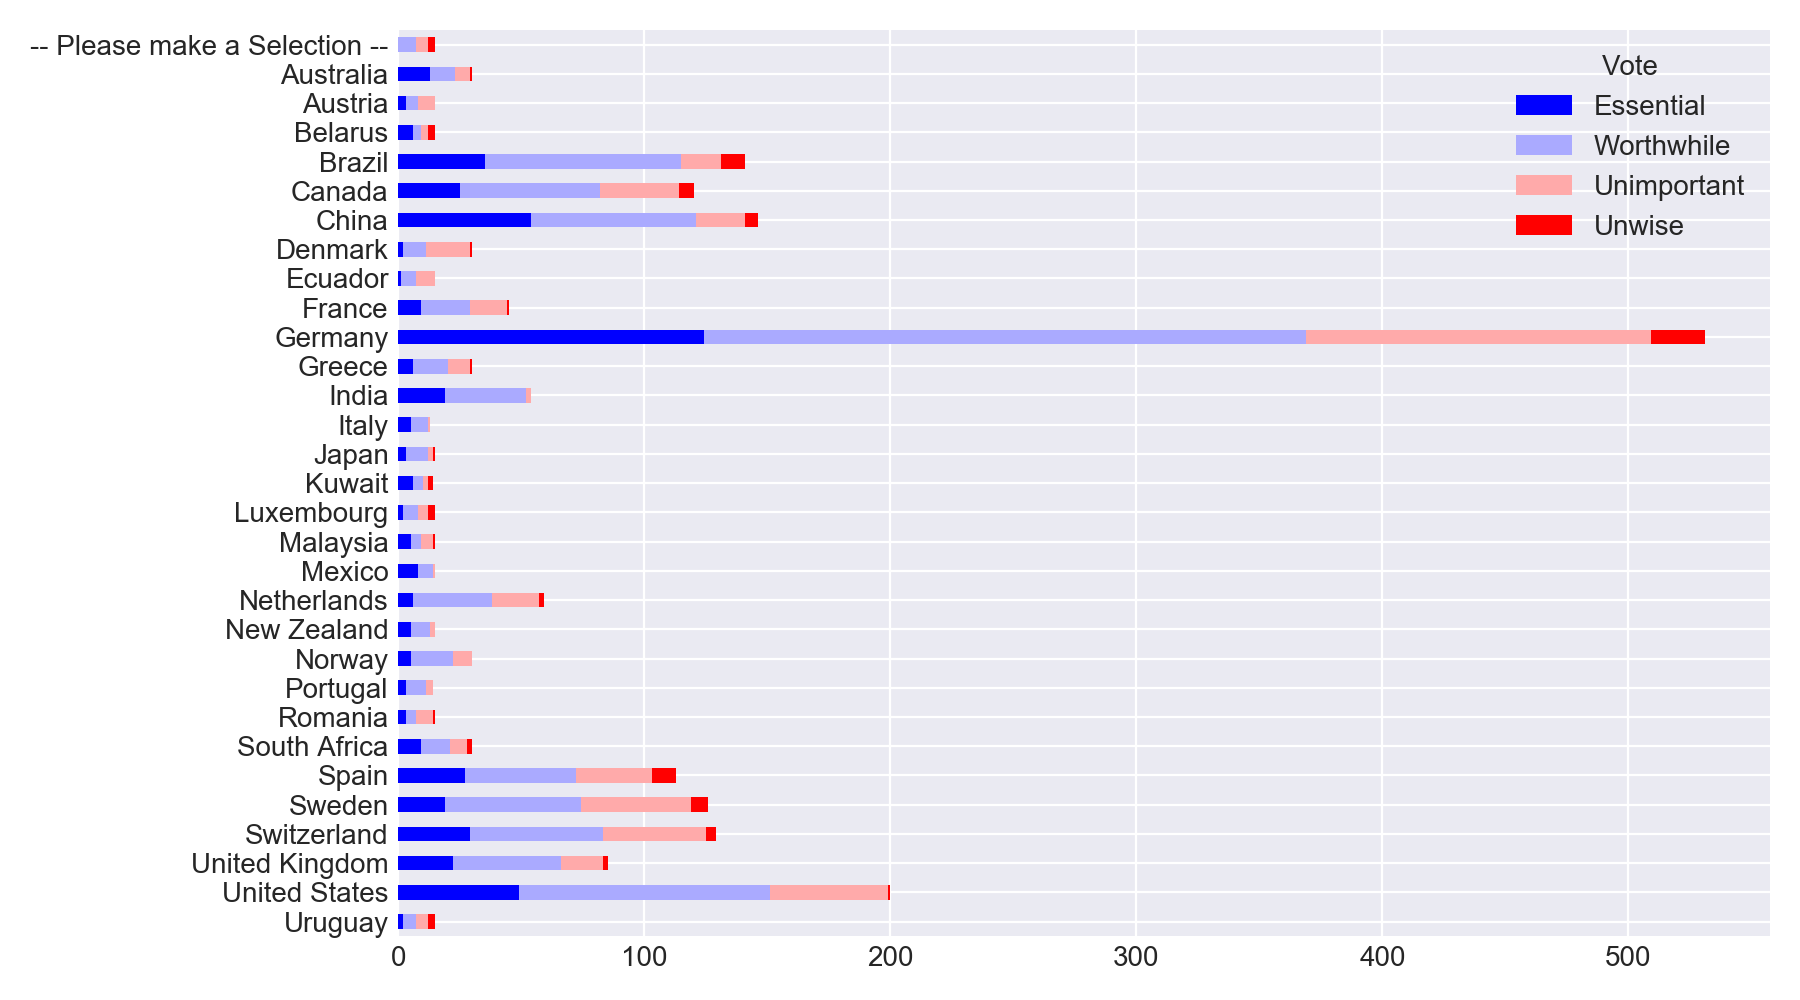

In [35]:
bycountry.plot.barh(stacked=True, cmap='bwr', figsize=(9,5))
plt.ylabel('')
plt.tight_layout()

Percentages

In [36]:
relbycountry = pd.DataFrame(index=bycountry.index)
for vote in bycountry.columns.values:
    relbycountry[vote] = bycountry[vote] / bycountry.sum(axis=1)

<IPython.core.display.Javascript object>


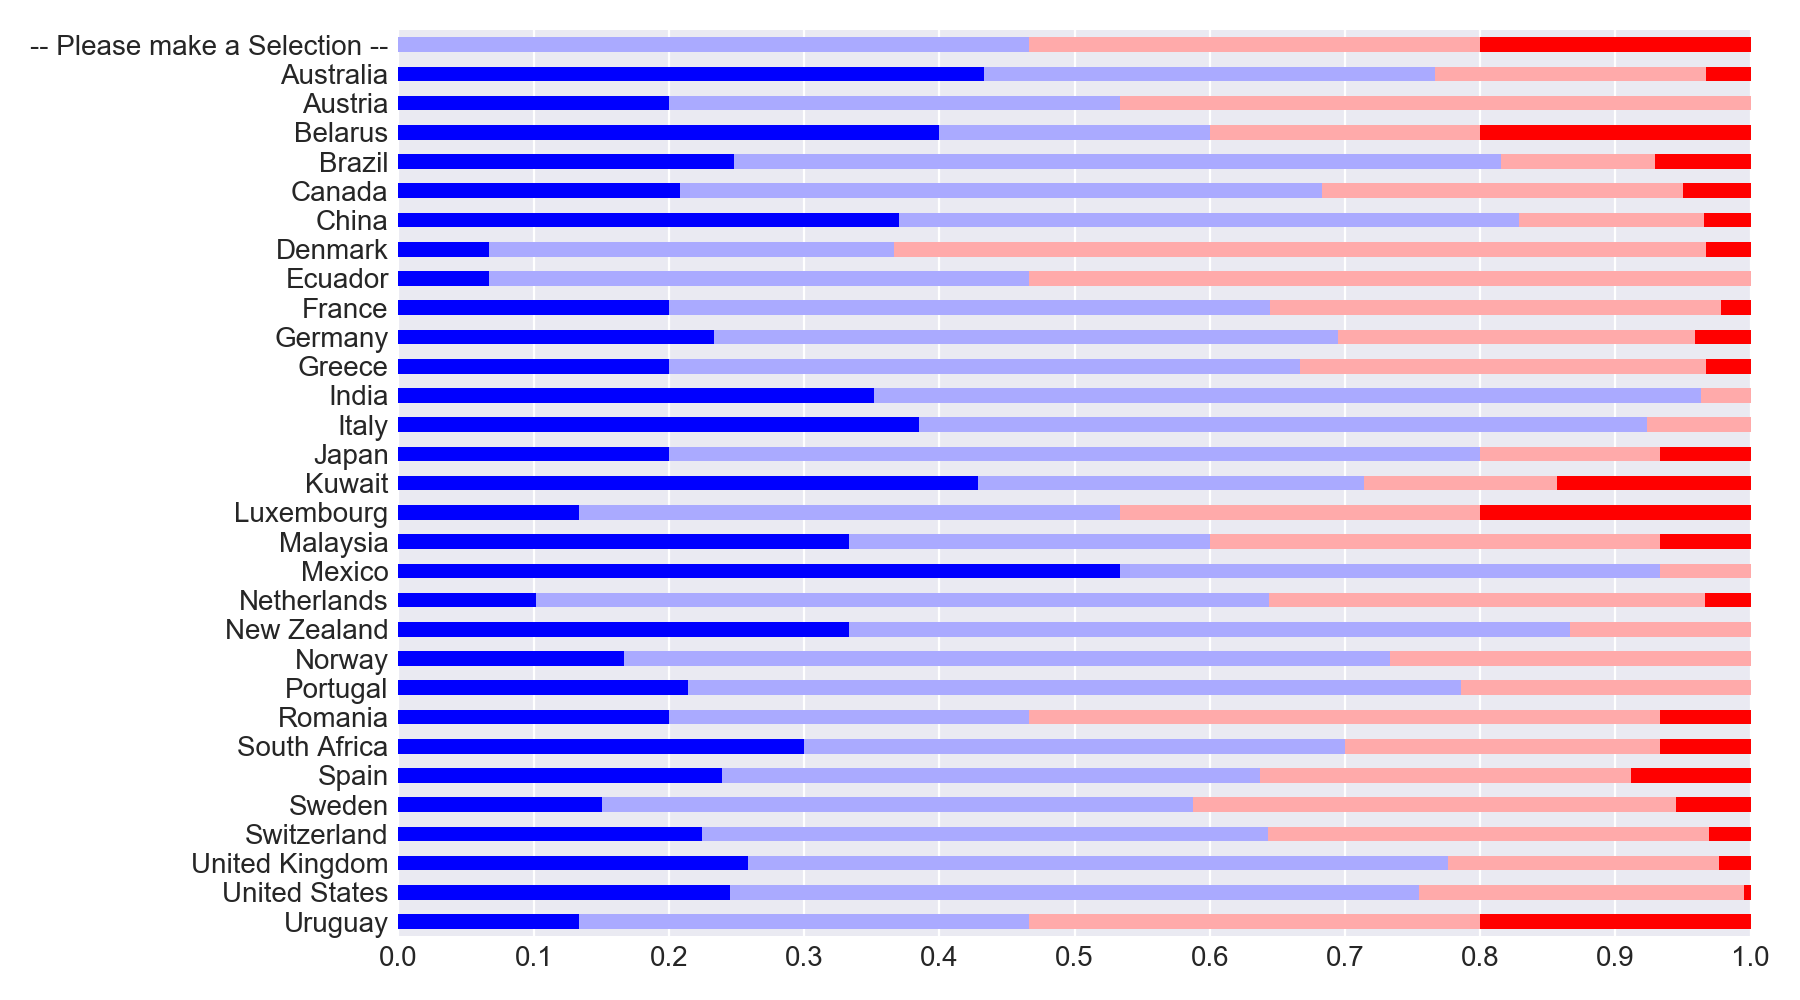

In [37]:
relbycountry.plot.barh(stacked=True, cmap='bwr', figsize=(9,5))
plt.xlim(0,1)
plt.xticks(np.arange(0,1.01,0.1))
plt.ylabel('')
plt.legend([])
plt.tight_layout()

### Role-Specific

<IPython.core.display.Javascript object>


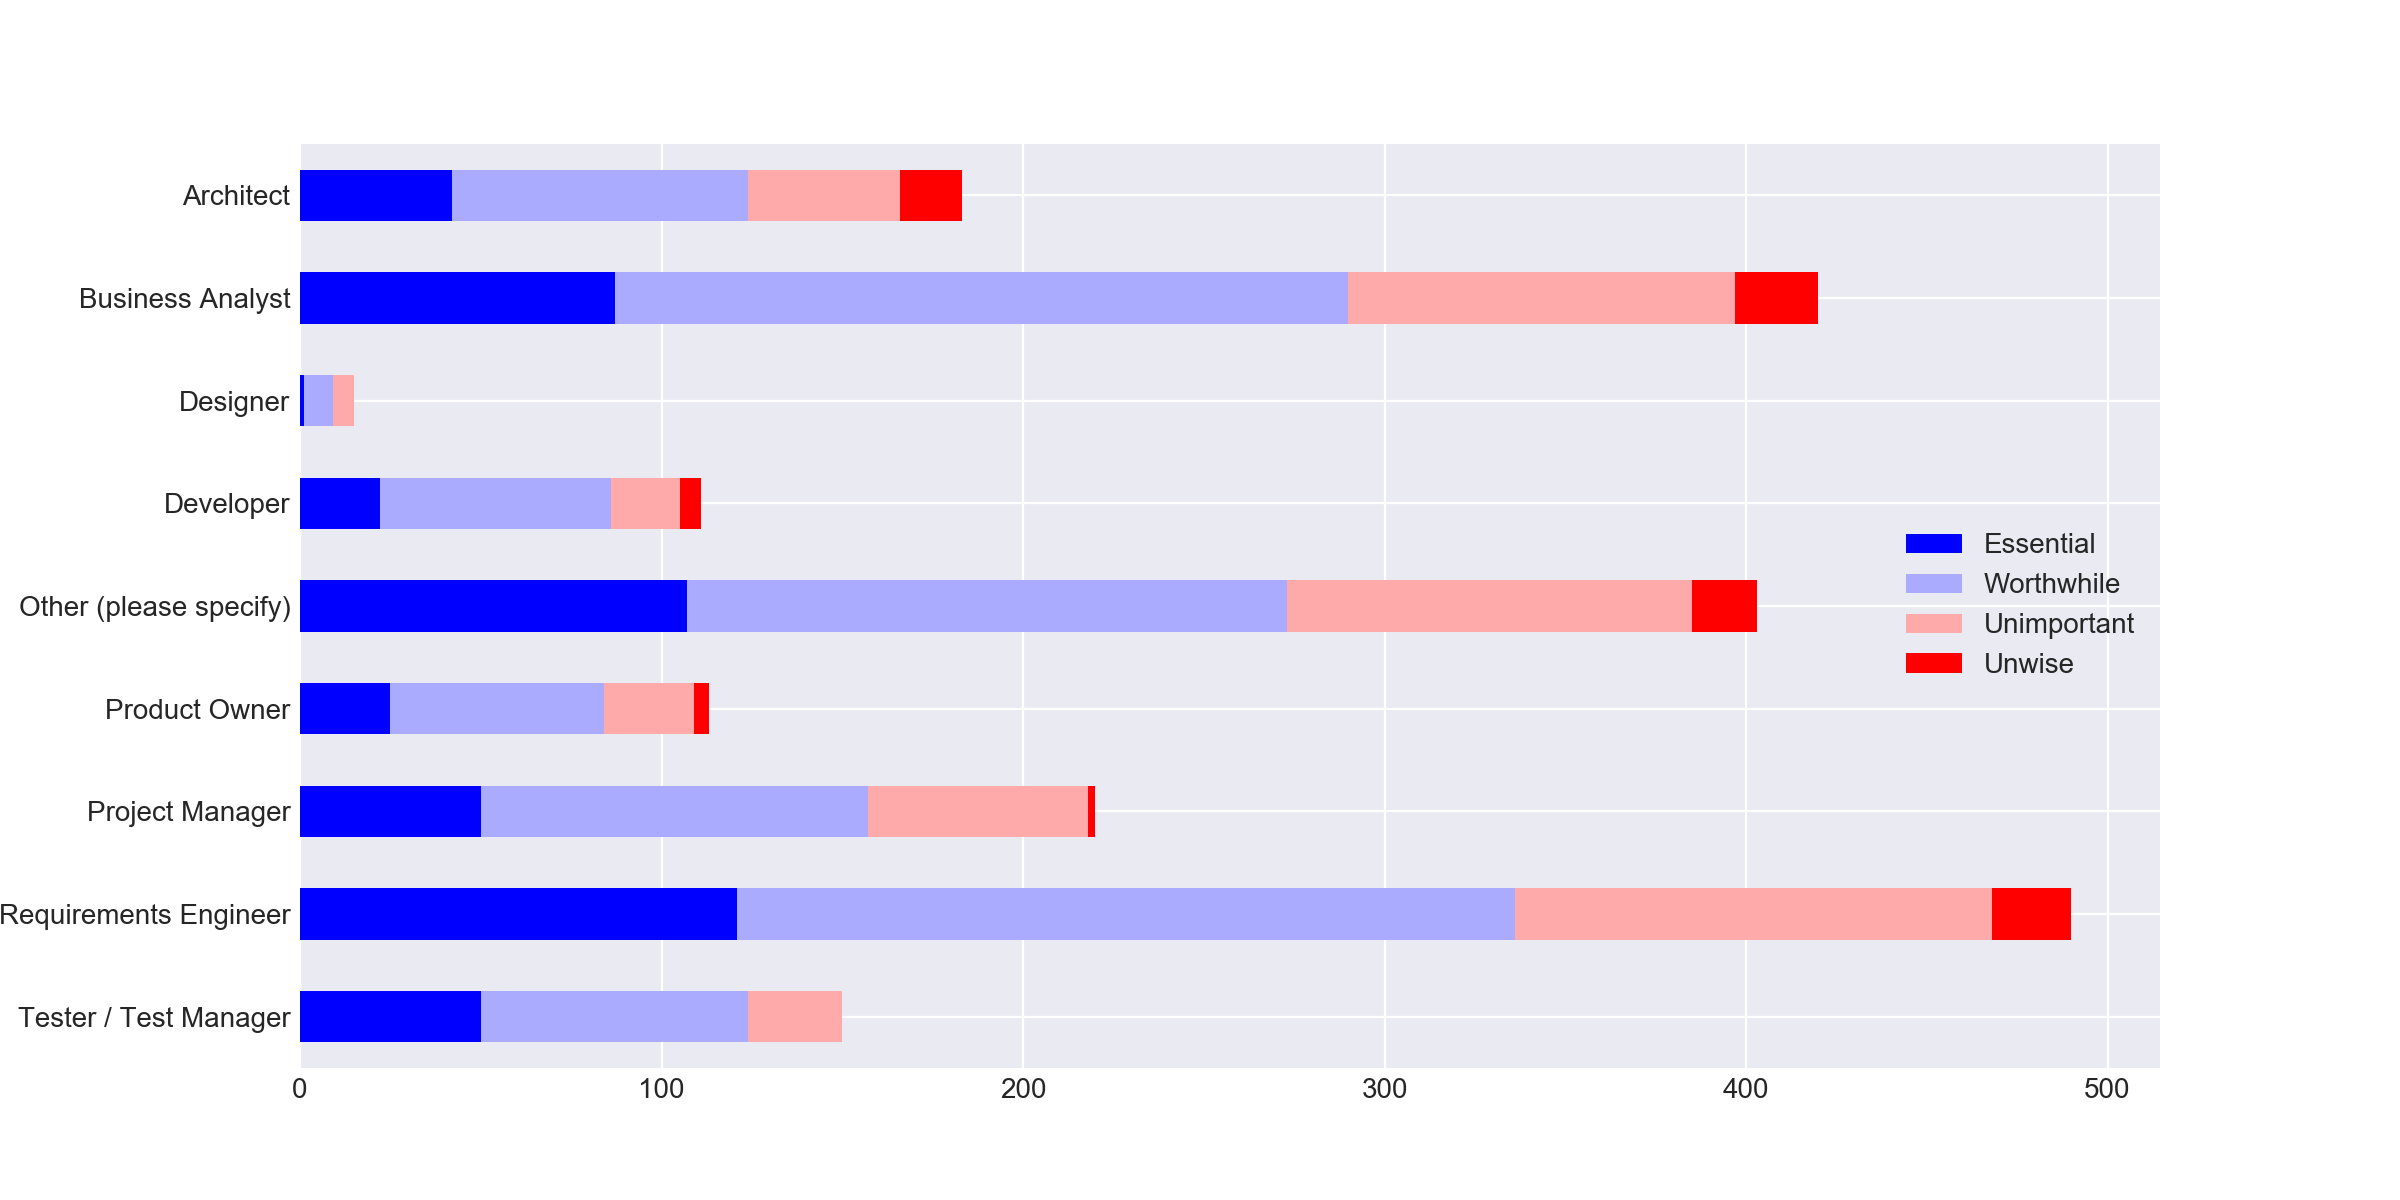

In [39]:
df.groupby(['v_5', 'Vote']
            ).count().reset_index().rename({'index':'v_5'}
                                          ).pivot('v_5', 'Vote', 'EvID'
            ).sort_index(ascending=False).fillna(0).plot.barh(
    stacked=True, cmap='bwr', figsize=(12,6))
plt.legend(loc='center right');

### By Team Size

In [60]:
df.groupby(['v_14', 'Vote']).count()[['EvID']]

EvID
v_14             Vote             
Small (1-4)      Essential      88
                 Worthwhile    148
                 Unimportant    77
                 Unwise         20
Medium (5-10)    Essential     211
                 Worthwhile    433
                 Unimportant   261
                 Unwise         39
Larger (10-49)   Essential     153
                 Worthwhile    316
                 Unimportant   141
                 Unwise         22
Very large (50+) Essential      53
                 Worthwhile     81
                 Unimportant    51
                 Unwise         11

<IPython.core.display.Javascript object>


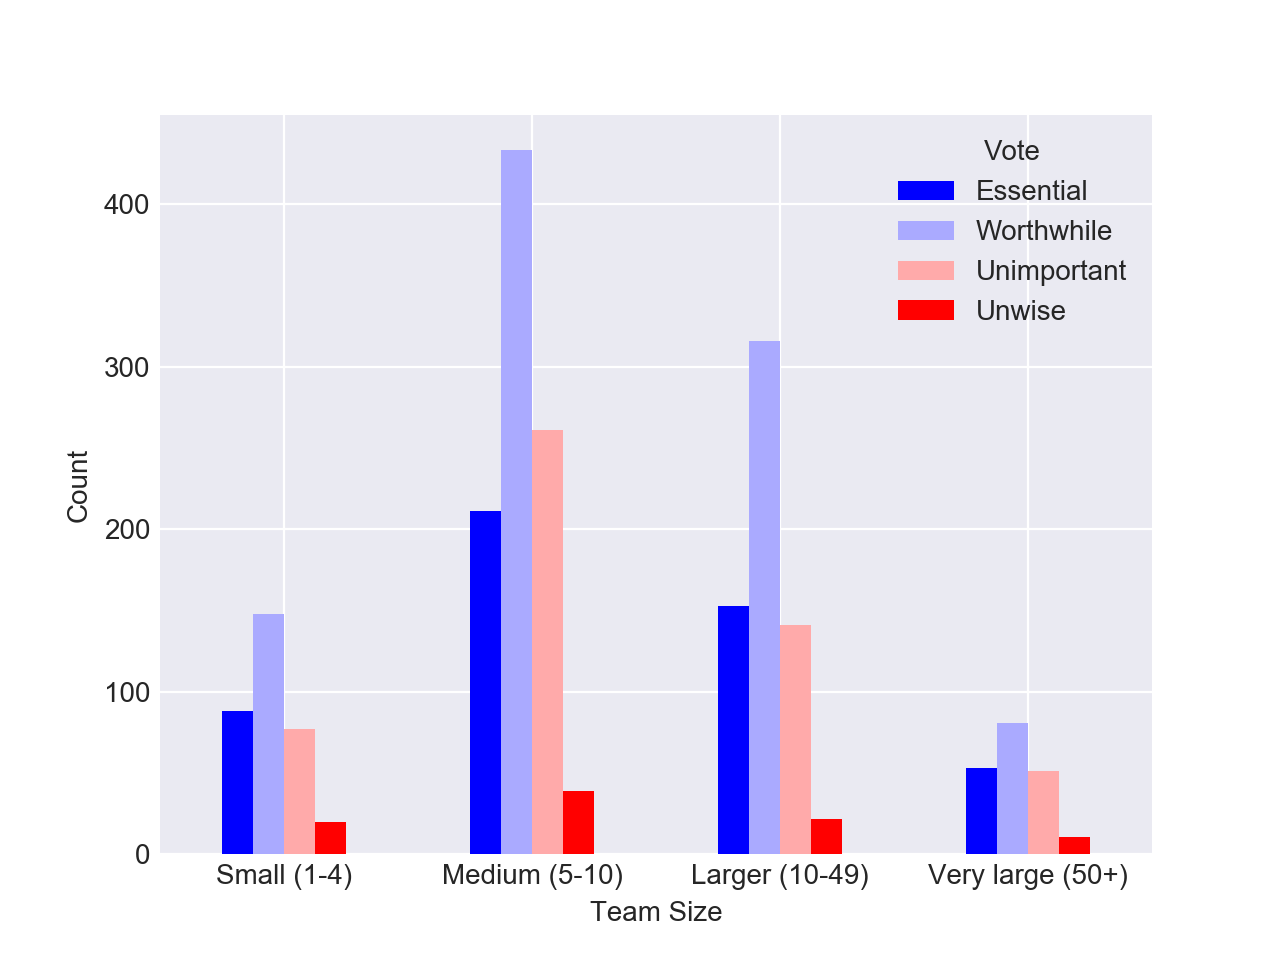

In [64]:
df.groupby(['v_14', 'Vote']).count()[['EvID']].reset_index(
).pivot('v_14', 'Vote', 'EvID').plot.bar(rot=0,cmap='bwr')
plt.xlabel('Team Size')
plt.ylabel('Count');

# TODO continue here